In [1]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [2]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

In [3]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
from sklearn.datasets import make_circles

X, targets = make_circles(n_samples = 1000, factor=0.1)
X_training = X[250:, :]
X_testing = X[:250, :]
Targets_training = targets[250:]
Targets_testing = targets[:250]

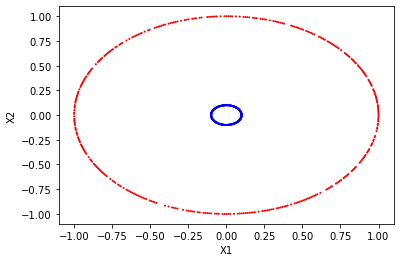

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_training[:,0], X_training[:,1], Targets_training == 0, color='red')
plt.scatter(X_training[:,0], X_training[:,1], Targets_training == 1, color='blue')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5)

Epoch 1/30
150/150 [==============================] - 0s 543us/step - loss: 0.6780 - accuracy: 0.4853
Epoch 2/30
150/150 [==============================] - 0s 584us/step - loss: 0.5360 - accuracy: 0.4853
Epoch 3/30
150/150 [==============================] - 0s 553us/step - loss: 0.3650 - accuracy: 0.4853
Epoch 4/30
150/150 [==============================] - 0s 615us/step - loss: 0.2029 - accuracy: 0.4853
Epoch 5/30
150/150 [==============================] - 0s 507us/step - loss: 0.0989 - accuracy: 0.4853
Epoch 6/30
150/150 [==============================] - 0s 601us/step - loss: 0.0509 - accuracy: 0.4853
Epoch 7/30
150/150 [==============================] - 0s 512us/step - loss: 0.0297 - accuracy: 0.4853
Epoch 8/30
150/150 [==============================] - 0s 597us/step - loss: 0.0189 - accuracy: 0.4853
Epoch 9/30
150/150 [==============================] - 0s 617us/step - loss: 0.0129 - accuracy: 0.4853
Epoch 10/30
150/150 [==============================] - 0s 529us/step - loss: 0.009

In [7]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(test_results)

8/8 [==============================] - 0s 855us/step - loss: 3.1660e-04 - accuracy: 0.5440
[0.00031660188687965274, 0.5440000295639038]


In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
y_train_full.shape

(60000,)

In [12]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

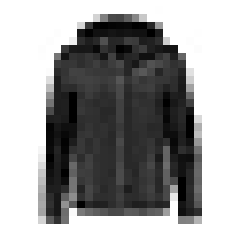

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
# 두 개의 은닉층이 있는 분류용 다층 퍼셉트론 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
# 혹은 아래와 같이 표현할 수도 있다.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [22]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.07040693,  0.02706887,  0.01191366, ...,  0.04290716,
        -0.02174354,  0.01191775],
       [-0.0379065 ,  0.05071688,  0.00347598, ..., -0.02467633,
        -0.01027492, -0.04472186],
       [-0.06971766,  0.04039605, -0.07319082, ..., -0.05267541,
        -0.05604764, -0.00273778],
       ...,
       [ 0.01218319,  0.0304298 , -0.06116831, ...,  0.0515957 ,
        -0.05279821, -0.00675702],
       [ 0.07335426, -0.047668  ,  0.01102718, ..., -0.03552113,
        -0.05171005, -0.06658989],
       [ 0.02111597, -0.00506879,  0.06767486, ..., -0.03235539,
        -0.01614228,  0.00968631]], dtype=float32)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
# 신경망 훈련
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7218 - accuracy: 0.7662 - val_loss: 0.5129 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4926 - accuracy: 0.8284 - val_loss: 0.4943 - val_accuracy: 0.8350
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4455 - accuracy: 0.8428 - val_loss: 0.4638 - val_accuracy: 0.8352
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4186 - accuracy: 0.8523 - val_loss: 0.3936 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3982 - accuracy: 0.8598 - val_loss: 0.3992 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3809 - accuracy: 0.8654 - val_loss: 0.3793 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3674 - accuracy: 0.8698 - val_loss: 0.3594 - val_accuracy:

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
history

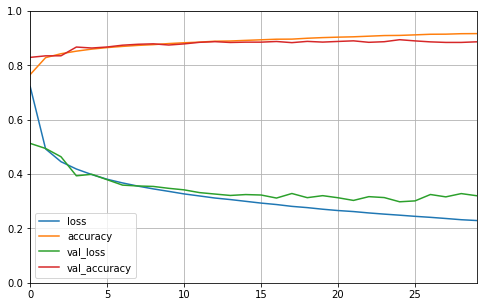

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 880us/step - loss: 0.3519 - accuracy: 0.8726


[0.3518993556499481, 0.8726000189781189]

In [29]:
X_new = X_test[:3]
X_new[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.2627451 , 0.69411765, 0.50588235, 0.6       , 0.45882353,
        0.50588235, 0.57254902, 0.55294118, 0.68627451, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.76862745, 1.        , 1.        , 1.        , 0.94509804,
        0.98431373, 1.        , 0.96078431, 1.        , 0.29803922,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.95294118, 0.92941176, 0.85098039, 0.89411765, 0.90588235,
        0.87058824, 0.8549

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

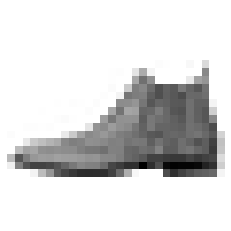

In [31]:
plt.imshow(X_new[0], cmap="binary")
plt.axis('off')
plt.show()

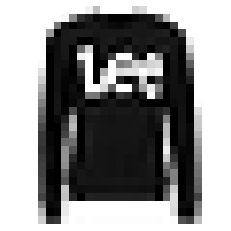

In [32]:
plt.imshow(X_new[1], cmap="binary")
plt.axis('off')
plt.show()

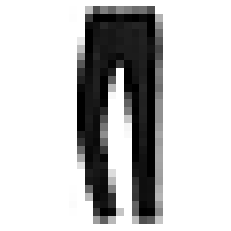

In [33]:
plt.imshow(X_new[2], cmap="binary")
plt.axis('off')
plt.show()

In [34]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
import numpy as np

In [36]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_pred

array([9, 2, 1], dtype=int64)

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

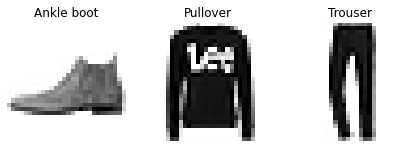

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()